# ------------------Created By Abas Mohammedidris -------------------------


# Pridicting hotel booking cancelation using Logistic Regression ,SVM ,K-NN &  Random Forest 

 # 1. Importing the Required libraries

In [267]:
import pandas as pd 
from sklearn import preprocessing
from sklearn import svm

import itertools
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.decomposition import PCA,KernelPCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import plotly.express as px
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss # doctest: +NORMALIZE_WHITESPACE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import learning_curve
from sklearn.metrics import matthews_corrcoef

import sklearn.metrics as metrics

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
from matplotlib.pyplot import show
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# 2.Data Pre-procssing 

## 2.1 Loading Dataset

In [225]:
#Loading data  
df = pd.read_csv('hotel_bookings.csv')

## 2.2 cleaning and EDA

* **To have a basic undersatnding for the dataset whcih is very important ,needs to know its shaape such as columns and rows**

**--------------The sahpe of the dataset is shown below----------**

In [226]:
df.shape                       # getting the shape of the dataset

(119390, 32)

In [227]:
print(df.columns.values)       # printing the dataset columns                         

['hotel' 'is_canceled' 'lead_time' 'arrival_date_year'
 'arrival_date_month' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'children' 'babies' 'meal' 'country'
 'market_segment' 'distribution_channel' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'reserved_room_type' 'assigned_room_type' 'booking_changes'
 'deposit_type' 'agent' 'company' 'days_in_waiting_list' 'customer_type'
 'adr' 'required_car_parking_spaces' 'total_of_special_requests'
 'reservation_status' 'reservation_status_date']


**It is very importnat to check how the features in the dataset are correlated and to do
so the code in the cell below is used**

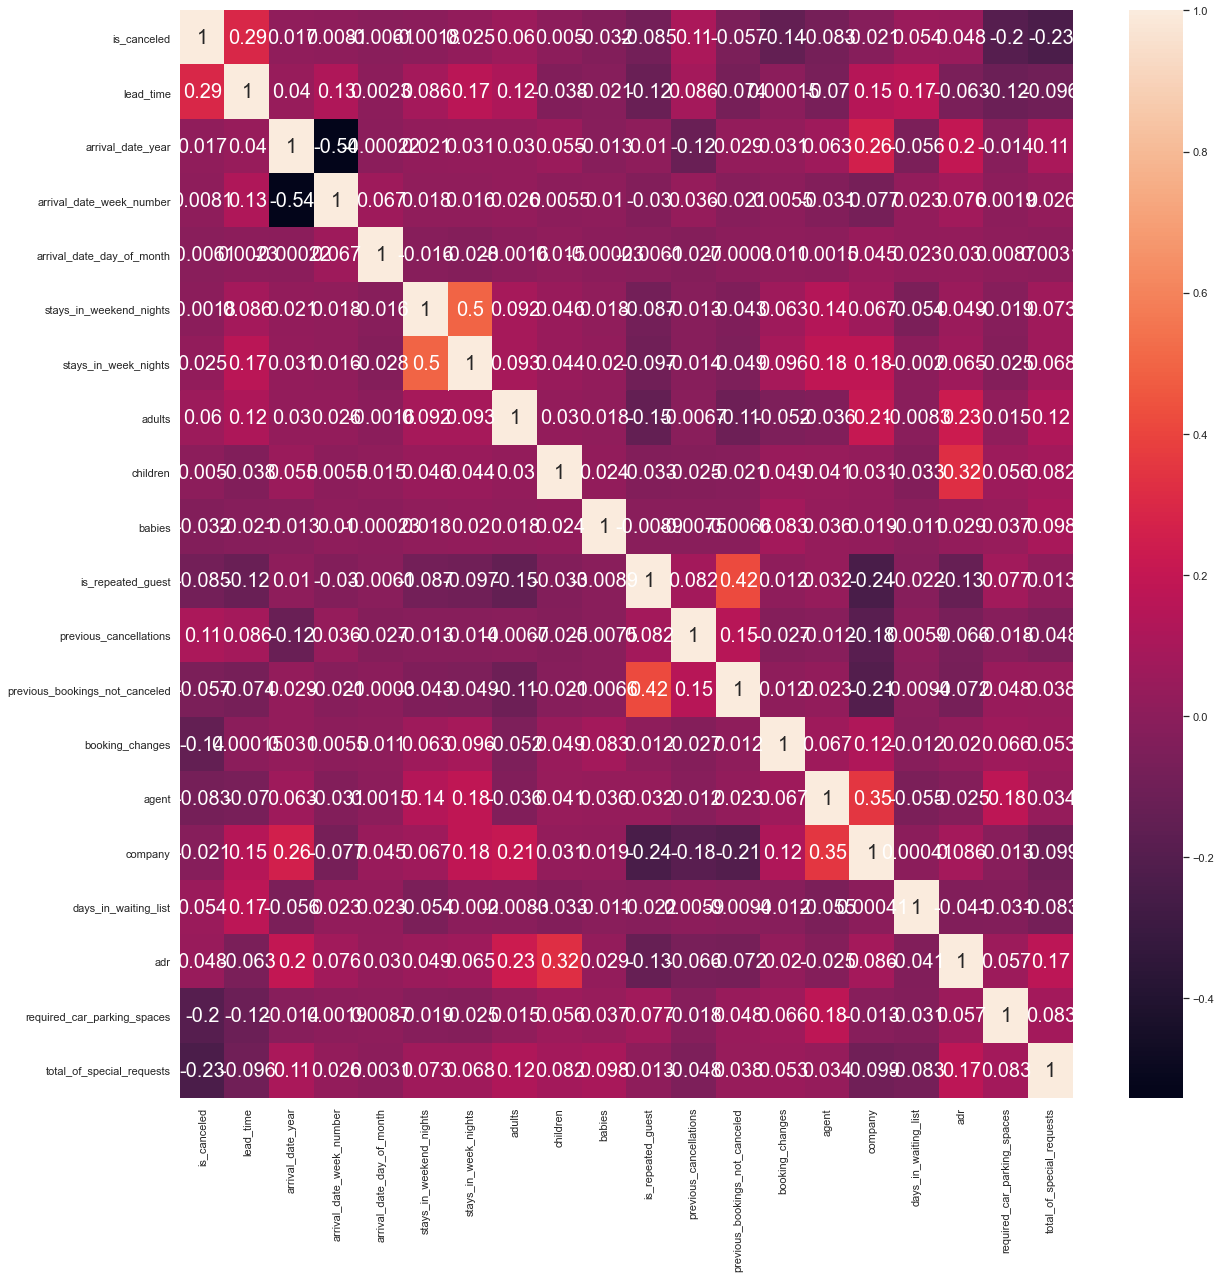

In [228]:
fig,axes = plt.subplots(1,1,figsize=(20,20))
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True,annot_kws={'size':20})

plt.show()

**The dataset has two classes whose are**

* **Canceled booking which is rerprents by 1**

* **Not_Canceled booking which is rerprents by 0**

**and to see the percentage of each class the code below used**

In [229]:
print('Not camcelled', round(df['is_canceled'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('cancelled ', round(df['is_canceled'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not camcelled 62.96 % of the dataset
cancelled  37.04 % of the dataset


### The dataset is a combination of two hotels dataset
* **City hotel**

* **Resort hotel**

**The code in the cell below is used to plot a barplot for both hotels separatley for canceled and not_canceled bookings**

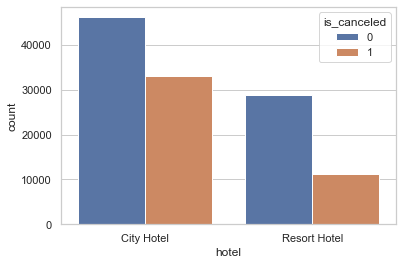

In [230]:
cancelprediction=df.groupby(["hotel","is_canceled"]).lead_time.count().reset_index()
cancelprediction.columns=["hotel","is_canceled","count"]
ax = sns.barplot(x="hotel", y="count", hue="is_canceled", data=cancelprediction)

In [231]:
df.info()    # The info function is used to have information about the features such as datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2.3 allocating and handling missing values

### 2.3.1 allocating missing values 

In [232]:
print("Number of NaN in each columns:", df.isnull().sum(), sep='\n')

Number of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                     

In [233]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Four columns have Nan values , whose are:
*  **Chlidren with 4 nan values**

*  **Country with 488 nan values**

*  **agent with 1640 nan values**

*  **Company with 112593 nan values**

**The code in the cell below is to check the data manually  for ( '?',etc)**

In [234]:
for i in df.columns:
    print(i+' -> \n',df[i].unique())
    print('\n','-_'*25)

hotel -> 
 ['Resort Hotel' 'City Hotel']

 -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
is_canceled -> 
 [0 1]

 -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
lead_time -> 
 [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145

**The code in the cell below is to convert 'reservation_status_date' column to seriestime**

In [235]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

**checking for the country that occurs most in the country column**

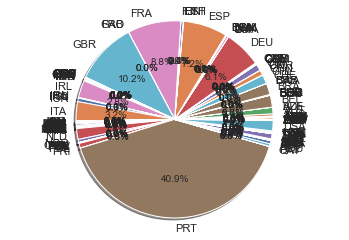

In [236]:
labels = df['country'].astype('category').cat.categories.tolist()
counts = df['country'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### 2.3.2 handiling misssing values

**the missing values in the agent column is replaced by the mean value as it is shown below**

In [237]:
df['agent'].fillna(value= df['agent'].mean(),inplace=True)
df['agent'].isnull().sum()

0

**PRT is the most country that has occurance with occurance of 40.9%  therefore the null is replaced by PRT**

In [238]:
df.country.fillna(value='PRT', inplace=True)

**handling missing values in children column**

In [239]:
df.children.fillna(value=0.0, inplace=True)

In [240]:
#cheking again for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

**replacing month name by its equivalent month number**

In [241]:
df['arrival_date_month'] = df['arrival_date_month'].replace
(['January','February','March','April','May','June','July','August','September','October','November','December'],
 ['1','2','3','4','5','6','7','8','9','10','11','12'])

(['January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'],
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

**dropping the unnecessary columns for the study**

In [242]:
df.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number','reservation_status','arrival_date_day_of_month',
         'reservation_status_date','company','previous_bookings_not_canceled' ,'country'], axis=1, inplace=True)

In [243]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,Direct,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,Direct,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,Direct,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.0,0,1


In [244]:
#computing columns with null values
null_columns={}
for i in df.columns:
    if df[i].isnull().sum()>0:
        null_columns[i]=df[i].isnull().sum()

        
null_columns

{}

**Plotting the two classes cancleled vs not canceled with percenatge using seaborn**

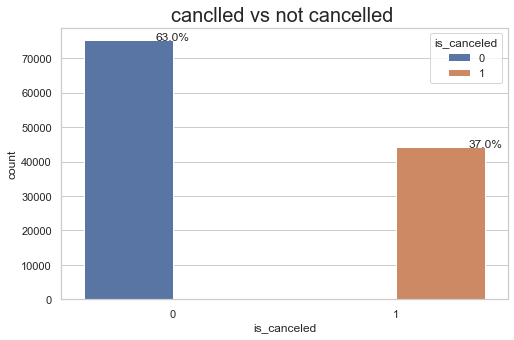

In [245]:
# plotting canceled booking versus not canceled with percentage
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="is_canceled", hue="is_canceled", data=df)
plt.title('canclled vs not cancelled ', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## 2.5 handling outlier

In [246]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

In [247]:
df1=df[(df['adr'] > lower_bound ) & (df['adr'] < upper_bound)]

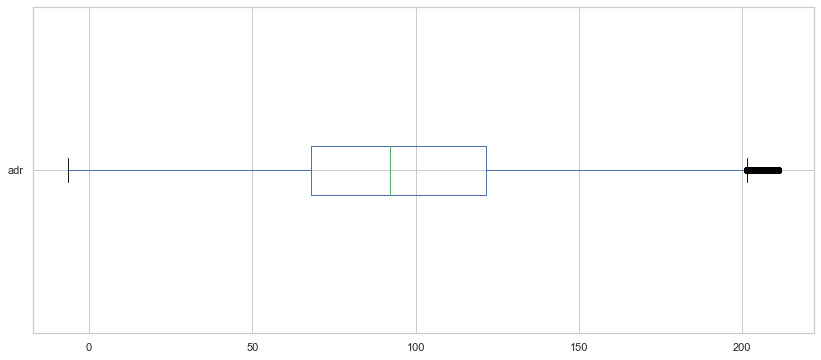

In [248]:
df1['adr'].plot(kind='box',vert=False, figsize=(14,6))

## 2.6 handling duplicates

In [249]:
##checking the rows that are dupliacted in the entire dataframe
#df1.loc[df1.duplicated(),:]

In [250]:
#df2=df.drop_duplicates(keep='first')

In [251]:
df2=df1

## 2.4 allocating and handling categorical data

In [252]:
categorical = [var for var in df2.columns if df2[var].dtypes=='object']
categorical

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [253]:
df_encoded=pd.get_dummies(df2,columns=['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
'assigned_room_type',
 'customer_type'],drop_first=True)

In [254]:
df_encoded.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0.0,0,0,0,3,86.693382,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,737,0,0,2,0.0,0,0,0,4,86.693382,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,86.693382,0,75.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,304.000000,0,75.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,240.000000,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [255]:
df2.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,Direct,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,Direct,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,Direct,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.0,0,1


In [256]:
# wcheck if there is still category data 
categorical = [var for var in df_encoded.columns if df_encoded[var].dtypes=='object']
categorical

[]

In [257]:
df_encoded.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0.0,0,0,0,3,86.693382,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,737,0,0,2,0.0,0,0,0,4,86.693382,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,86.693382,0,75.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,304.000000,0,75.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,240.000000,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 3.Balancinng dataset

## Smote oversampling 

## 3.1 Split data into training amd testing 

In [258]:
X=df_encoded.drop('is_canceled',axis=1)
Y=df_encoded['is_canceled']
print(X.shape)
print(Y.shape)

(115597, 55)
(115597,)


In [259]:
#splitting data  to training and testing datset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [260]:
df_encoded.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,0,0,2,0.0,0,0,0,3,86.693382,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,737,0,0,2,0.0,0,0,0,4,86.693382,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,86.693382,0,75.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,304.000000,0,75.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,240.000000,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 3.2 Smote_oversampling

In [261]:
from imblearn.over_sampling import SMOTENC 
sm = SMOTENC([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
              36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54], random_state=0)
X_trian_smotenc, y_train_smotenc = sm.fit_sample(X_train, y_train.ravel())   

In [262]:
from collections import Counter
print("Before SMOTE:",Counter(y_train))
print("After SMOTE:",Counter(y_train_smote))

Before SMOTE: Counter({0: 51034, 1: 29883})
After SMOTE: Counter({0: 51034, 1: 51034})


## 3.3 Random_oversampling 

In [163]:
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train.ravel()) 

In [164]:
print("Before ROS:",Counter(y_train))
print("After ROS:",Counter(y_train_ros))

Before ROS: Counter({0: 51034, 1: 29883})
After ROS: Counter({0: 51034, 1: 51034})


## 3.4 Random_unsdersampling

In [107]:
rus = RandomUnderSampler(random_state=0)

In [108]:
X_trian_rus, y_train_rus = rus.fit_sample(X_train, y_train.ravel()) 

In [109]:
print("Before RUS:",Counter(y_train))
print("After RUS:",Counter(y_train_rus))

Before RUS: Counter({0: 51034, 1: 29883})
After RUS: Counter({0: 29883, 1: 29883})


# 4.Feature engineering 

In [110]:
#from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(df_encoded)
df_encoded = scaling.transform(df_encoded)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

In [111]:
model = PCA()
model.fit(X)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

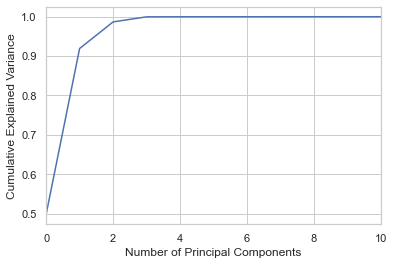

In [112]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

In [113]:
np.cumsum(model.explained_variance_ratio_)[2]

0.9867632992499468

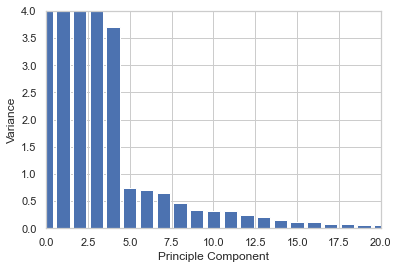

In [114]:
plt.bar(range(model.n_components_), model.explained_variance_)
plt.xlabel('Principle Component')
plt.ylabel('Variance')
plt.xlim([0,20])
plt.ylim([0,4])
plt.show() 

# 4.Prediction models

**==============Models Evaluation Function=========**

In [333]:

def Evaluation(y_test,y_pred,title):
    # Build confusion metrics
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix in a beautiful manner
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom') 
    plt.title(title)

    ax.set_ylabel('True', fontsize=20)
    plt.show()

    tn,fp,fn,tp=cm.ravel()
    print('accuracy:',(tp+tn)/(tn+fp+fn+tp))
    print('precision:',(tp)/(fp+tp))
    print('recall:',(tp)/(fn+tp))

**============== Learning Curve function ===============***

In [166]:
%%time
# Learning curve
def learningFunction(model, X_train, y_train):
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                                train_sizes = np.linspace(0.01, 1.0, 50), cv= 5, n_jobs=-1, scoring='accuracy')

    print(N)
    plt.plot(N, train_score.mean(axis=1), label = 'train')
    plt.plot(N, val_score.mean(axis=1), label = 'validation')
    plt.xlabel('Train sizes')
    plt.legend()

Wall time: 0 ns


**===================ROC Curve Function =========================**

In [199]:
#ROC Curve
def roc_function(classifier1,classifier2,classifier3,X_test,Y_test):
    y_pred_prob1 = classifier1.predict_proba(X_test)[:,1]
    fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)
    y_pred_prob2 = classifier2.predict_proba(X_test)[:,1]
    fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)


    y_pred_prob3 = classifier3.predict_proba(X_test)[:,1]
    fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)

    plt.figure(figsize=(10,10))
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr1, tpr1, label= "smotenc")
    plt.plot(fpr2, tpr2, label= "random_oversampling")
    plt.plot(fpr3, tpr3, label= "random_undersampling")
 
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title('Receiver Operating Characteristic')
    plt.show()

**===================cross_val_score  Function =========================**

In [274]:
def cvl(model,X,y):
    cvl=cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cvl1=cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    cvl2=cross_val_score(model, X, y, cv=5, scoring='precision')
    cvl3=cross_val_score(model, X, y, cv=5, scoring='precision').mean()
    cvl4=cross_val_score(model, X, y, cv=5, scoring='f1')
    cvl5=cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    cvl6=cross_val_score(model, X, y, cv=5, scoring='recall')
    cvl7=cross_val_score(model, X, y, cv=5, scoring='recall').mean()
    cvl8=cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    cvl9=cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()

    print('accuracy:',cvl)
    print('===============================================================')
    print('accuracy_mean:',cvl1)
    print('===============================================================')
    print('precision:',cvl2)
    print('===============================================================')
    print('precision_mean:',cvl3)
    print('===============================================================')
    print('f1:',cvl4)
    print('===============================================================')
    print('f1_mean:',cvl5)
    print('===============================================================')
    print('recall/sensitivity:',cvl6)
    print('===============================================================')
    print('recall/sensitivity_mean:',cvl7)
    print('===============================================================')
    print('roc_auc:',cvl8)
    print('===============================================================')
    print('roc_auc_mean:',cvl9)
    print('===============================================================')


## 4.1 K-NN classfier

### 4.1.1 Hyperparameter tuning for K-NN classfier function

In [208]:
%%time
def KNN_param(X_trian, y_train):
    model_KNN = make_pipeline(MinMaxScaler(), PCA(), KNeighborsClassifier() )

    params = {
         'kneighborsclassifier__n_neighbors': np.arange(1, 30),
         'pca__n_components': [2],
         'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski','chebyshev'],
         'kneighborsclassifier__weights': ['uniform', 'distance']
    }

    grid_KNN= GridSearchCV(model_KNN, param_grid = params, cv = 5, n_jobs=-1)
    grid_fit_KNN = grid_KNN.fit(X_trian, y_train)
    print('best parameters for KNN:',grid_fit_KNN.best_params_)

Wall time: 0 ns


### 4.1.2 K-NN Classifier with smote oversampling data

**== Compute the parameters for the KNN classfier for smote_oversampling data by calling the function ==**

In [173]:
KNN_param(X_trian_smotenc, y_train_smotenc)

best parameters for KNN: {'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 29, 'kneighborsclassifier__weights': 'distance', 'pca__n_components': 2}


**The parameters used for this pipeline ara computed in the previuos section using gridsearch**

In [209]:
## making pipline with the the obatined parameters using gridsearch
KNN_pipe_smote1 = make_pipeline(MinMaxScaler(), PCA(n_components=2), 
                         KNeighborsClassifier(n_neighbors=29, metric= 'minkowski' , weights='distance'))

In [210]:
KNN_pipe_smote1.fit(X_trian_smotenc, y_train_smotenc)     # training the model
y_pred1 =KNN_pipe_smote1.predict(X_test)              # making predictions

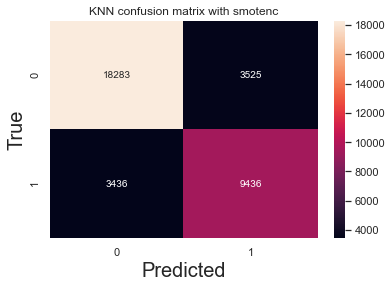

accuracy: 0.7992791234140715
precision: 0.7280302445798935
recall: 0.733064014916097


In [335]:
Evaluation(y_test, y_pred1 , 'KNN confusion matrix with smotenc')                      # Evaluate the model by calling the evaluation function

**=========Evaluating model cross_val_score=====**

In [275]:
cvl(KNN_pipe_smote1,X_trian_smotenc, y_train_smotenc)

accuracy: [0.81424513 0.81081611 0.80831782 0.85759075 0.85416156]
accuracy_mean: 0.8290262741383667
precision: [0.83248678 0.82931894 0.82740325 0.83939366 0.83183404]
precision_mean: 0.8320873321888417
f1: [0.80900574 0.80532312 0.8025632  0.86130063 0.85891664]
f1_mean: 0.827401663017139
recall/sensitivity: [0.78681297 0.78260018 0.77917116 0.88438174 0.88782208]
recall/sensitivity_mean: 0.824157624801337
roc_auc: [0.89982813 0.89791403 0.8942325  0.93918524 0.9374972 ]
roc_auc_mean: 0.9137365156878398


### 4.1.3 K-NN Classifier with Random oversampling data

**== Compute the parameters for the KNN classfier for random_oversampling data by calling the function ==**

In [74]:
KNN_param(X_train_ros, y_train_ros)

best parameters for KNN: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 27, 'kneighborsclassifier__weights': 'distance', 'pca__n_components': 2}


In [276]:
## making pipline with the the obatined parameters using gridsearch for data with random oversampling
KNN_pipe_ros1 = make_pipeline(MinMaxScaler(), PCA(n_components=2), 
                         KNeighborsClassifier(n_neighbors=27, metric= 'manhattan' , weights='distance'))

In [277]:
KNN_pipe_ros1.fit(X_train_ros, y_train_ros)     # training the model
y_pred2 =KNN_pipe_ros1.predict(X_test)              # making predictions

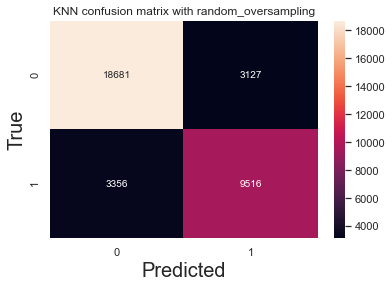

accuracy: 0.8130622837370243
precision: 0.7526694613620185
recall: 0.7392790553138595


In [336]:
Evaluation(y_test, y_pred2, 'KNN confusion matrix with random_oversampling')                      # Evaluate the model by calling the evaluation function

In [279]:
cvl(KNN_pipe_ros1,X_train_ros, y_train_ros)

accuracy: [0.85710787 0.85544234 0.85088665 0.90491354 0.90128839]
accuracy_mean: 0.8740257294203012
precision: [0.83431031 0.8359136  0.82951513 0.84549787 0.84048213]
precision_mean: 0.837108969630104
f1: [0.86239053 0.85956313 0.85557032 0.91243741 0.90938526]
f1_mean: 0.8797581701361837
recall/sensitivity: [0.89085921 0.88341334 0.88331537 0.99088771 0.99059469]
recall/sensitivity_mean: 0.9280883881201746
roc_auc: [0.94552609 0.94306595 0.9415242  0.99340906 0.99328437]
roc_auc_mean: 0.9634027589689431


### 4.1.4 K-NN Classifier with Random undersampling data

**== Compute the parameters for the KNN classfier for random_undersampling data by calling the function ==**

In [86]:
KNN_param(X_trian_rus, y_train_rus)

best parameters for KNN: {'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'distance', 'pca__n_components': 2}


In [280]:
## making pipline with the the obatined parameters using gridsearch for data with random undersampling
KNN_pipe_rus1 = make_pipeline(MinMaxScaler(), PCA(n_components=2), 
                         KNeighborsClassifier(n_neighbors=25, metric= 'minkowski' , weights='distance'))

In [281]:
KNN_pipe_rus1.fit(X_trian_rus, y_train_rus)     # training the model
y_pred3 =KNN_pipe_rus1.predict(X_test)              # making predictions

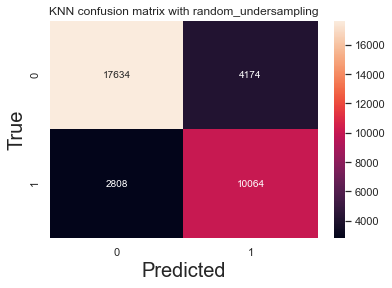

accuracy: 0.7986735870818916
precision: 0.7068408484337688
recall: 0.7818520820385333


In [337]:
Evaluation(y_test, y_pred3, 'KNN confusion matrix with random_undersampling')                      # Evaluate the model by calling the evaluation function

In [283]:
cvl(KNN_pipe_rus1,X_trian_rus, y_train_rus)

accuracy: [0.8026602  0.80071948 0.80373128 0.79912993 0.79335732]
accuracy_mean: 0.7999196409236606
precision: [0.80495617 0.80242343 0.80867347 0.80459966 0.8034262 ]
precision_mean: 0.8047954331624216
f1: [0.80191452 0.80016779 0.80212551 0.79733266 0.78989452]
f1_mean: 0.7982802910441305
recall/sensitivity: [0.79889577 0.79802544 0.79568273 0.79019575 0.77681111]
recall/sensitivity_mean: 0.7919221585466286
roc_auc: [0.89138671 0.8885253  0.89341806 0.88714587 0.88295517]
roc_auc_mean: 0.8887034817119431


### ======ROC_AUC curve for KNN=====

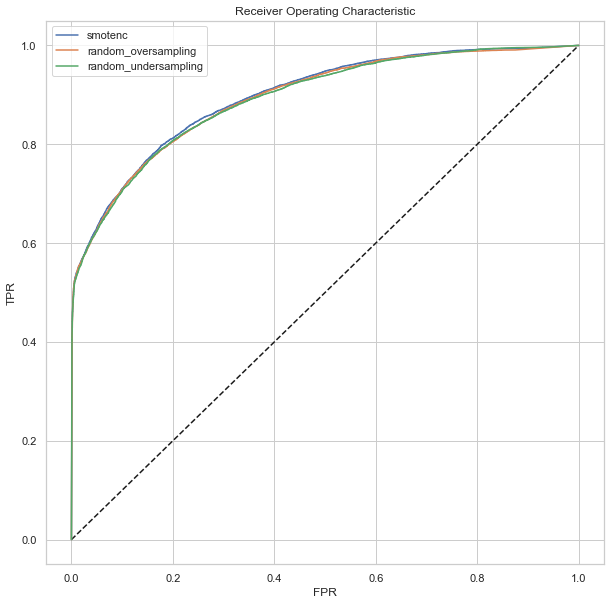

In [284]:
roc_function(KNN_pipe_smote1,KNN_pipe_ros1,KNN_pipe_rus1,X_test,y_test)

## 4.2 Random Forest  Classfier

### 4.2.1 Hyperparameter tuning for Random Forest classfier function

In [285]:
%%time
def RFC_param(X_train, y_train):
    model_RFC = make_pipeline(MinMaxScaler(), PCA(), RandomForestClassifier(n_jobs=-1,oob_score = True))

    params = {
         'randomforestclassifier__n_estimators': [200, 700],
         'pca__n_components': [2],
         'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    }

    grid_RFC= GridSearchCV(model_RFC, param_grid = params, cv = 5, n_jobs=-1)
    grid_RFC.fit(X_train, y_train)
    print('best parameters for RFC:',grid_RFC.best_params_)

Wall time: 0 ns


### 4.2.2 Random forest Classifier with smote oversampling data

**== Compute the parameters for the RFC classfier for smote oversampling data by calling the function ==**

In [202]:
RFC_param(X_trian_smotenc, y_train_smotenc)

best parameters for RFC: {'pca__n_components': 2, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__n_estimators': 700}


In [286]:
## making pipline with the the obatined parameters using gridsearch
RFC_pipe_smote1 = make_pipeline(MinMaxScaler(), PCA(n_components=2),
                         RandomForestClassifier(n_estimators=700,max_features='log2',n_jobs=-1,oob_score = True))


In [287]:
RFC_pipe_smote1.fit(X_trian_smotenc, y_train_smotenc)     # training the model
y_pred1 =RFC_pipe_smote1.predict(X_test)              # making predictions

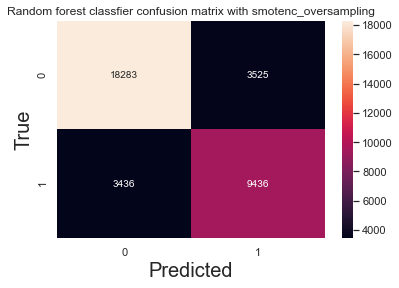

accuracy: 0.7992791234140715
precision: 0.7280302445798935
recall: 0.733064014916097


In [338]:
Evaluation(y_test, y_pred1, 'Random forest classfier confusion matrix with smotenc_oversampling')                      # Evaluate the model by calling the evaluation function

In [289]:
#evaluate the model using cross_val_score
cvl(RFC_pipe_smote1,X_trian_smotenc, y_train_smotenc)

accuracy: [0.80640737 0.80939551 0.80591751 0.84627443 0.84578455]
accuracy_mean: 0.822755866318877
precision: [0.83220123 0.83416446 0.83126261 0.8333964  0.82783985]
precision_mean: 0.8318538039535002
f1: [0.79912352 0.80169336 0.79828807 0.84816099 0.84860919]
f1_mean: 0.8190385883138613
recall/sensitivity: [0.76663074 0.76996179 0.76780641 0.86370762 0.87214657]
recall/sensitivity_mean: 0.8080702148266529
roc_auc: [0.8890573  0.8896571  0.88660578 0.93084087 0.93026397]
roc_auc_mean: 0.9052407334329866


### 4.2.3 Random forest Classifier with random oversampling data

In [108]:
RFC_param(X_train_ros, y_train_ros)

best parameters for RFC: {'pca__n_components': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 200}


In [290]:
## making pipline with the the obatined parameters using gridsearch
RFC_pipe_ros1 = make_pipeline(MinMaxScaler(), PCA(n_components=2),
                         RandomForestClassifier(n_estimators=200,max_features='sqrt',n_jobs=-1,oob_score = True))

In [291]:
RFC_pipe_ros1.fit(X_train_ros, y_train_ros)     # training the model
y_pred2 =RFC_pipe_ros1.predict(X_test)              # making predictions

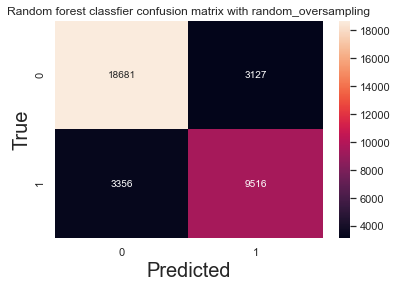

accuracy: 0.8130622837370243
precision: 0.7526694613620185
recall: 0.7392790553138595


In [339]:
Evaluation(y_test, y_pred2, 'Random forest classfier confusion matrix with random_oversampling')                      # Evaluate the model by calling the evaluation function

In [293]:
#evaluate the model using cross_val_score
cvl(RFC_pipe_ros1,X_train_ros, y_train_ros)

accuracy: [0.86034094 0.85985108 0.85661801 0.91495616 0.91191888]
accuracy_mean: 0.8806684360432815
precision: [0.85730949 0.86150373 0.85559672 0.86043937 0.85782192]
precision_mean: 0.8581206008866664
f1: [0.86102984 0.86013917 0.856724   0.92114973 0.91901232]
f1_mean: 0.8839910625857655
recall/sensitivity: [0.86372098 0.85823454 0.85833252 0.99118166 0.99069266]
recall/sensitivity_mean: 0.9133533946465523
roc_auc: [0.9329237  0.93181601 0.93042966 0.98021291 0.98014365]
roc_auc_mean: 0.9510947085940306


### 4.2.3 Random forest Classifier with random undersampling data

In [115]:
RFC_param(X_trian_rus, y_train_rus)

best parameters for RFC: {'pca__n_components': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 200}


In [294]:
## making pipline with the the obatined parameters using gridsearch
RFC_pipe_rus1 = make_pipeline(MinMaxScaler(), PCA(n_components=2),
                         RandomForestClassifier(n_estimators=200,max_features='auto',n_jobs=-1,oob_score = True))

In [295]:
RFC_pipe_rus1.fit(X_trian_rus, y_train_rus)     # training the model
y_pred3 =RFC_pipe_rus1.predict(X_test)              # making predictions

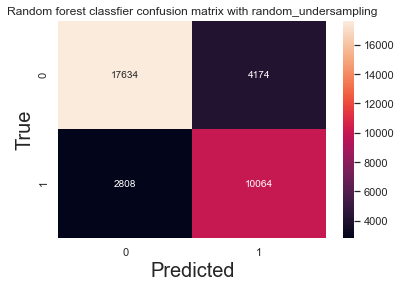

accuracy: 0.7986735870818916
precision: 0.7068408484337688
recall: 0.7818520820385333


In [340]:
Evaluation(y_test, y_pred3, 'Random forest classfier confusion matrix with random_undersampling')                      # Evaluate the model by calling the evaluation function

In [298]:
#evaluate the model using cross_val_score
cvl(RFC_pipe_rus1,X_trian_rus, y_train_rus)


accuracy: [0.79588422 0.78900694 0.79327366 0.78666444 0.78348532]
accuracy_mean: 0.7897633012215697
precision: [0.80214907 0.79622318 0.80150711 0.79295533 0.79947276]
precision_mean: 0.7993595398948797
f1: [0.79370984 0.78577477 0.79244004 0.78311721 0.77989898]
f1_mean: 0.7868934521837632
recall/sensitivity: [0.78551113 0.77660643 0.78279786 0.7724611  0.76158608]
recall/sensitivity_mean: 0.775625187717576
roc_auc: [0.8785289  0.87605991 0.88051789 0.87338577 0.86989492]
roc_auc_mean: 0.8756089898189501


In [ ]:
## roc_auc curve for random forest classfier

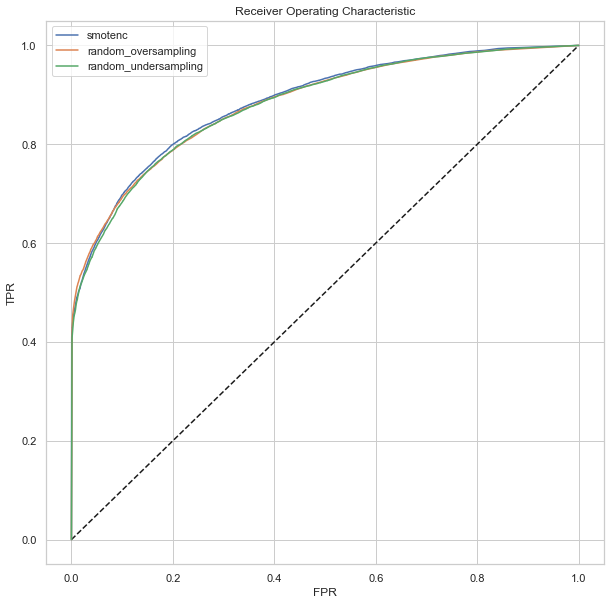

In [299]:
roc_function(RFC_pipe_smote1,RFC_pipe_ros1,RFC_pipe_rus1,X_test,y_test)

## 4.3 NIAV Bias classifier

In [305]:
%%time
def GNB(X_train,y_train,X_test):
    model_GNB = make_pipeline(MinMaxScaler(), PCA(), GaussianNB())

    params = {

         'pca__n_components': [2]
    }

    grid_GNB= GridSearchCV(model_GNB, param_grid = params, cv = 5, n_jobs=-1)
    grid_fit_KNN = grid_GNB.fit(X_train,y_train)
    y_pred =grid_GNB.predict(X_test)
    print("")
    print('-----------------------------------------------------------------')
    print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
    print("")
    print('-----------------------------------------------------------------')
    print(confusion_matrix(y_test, y_pred))
    print("")
    print('-----------------------------------------------------------------')
    print(classification_report(y_test,y_pred))
    return grid_GNB, y_pred

Wall time: 0 ns


### 4.3.1 NIAV bias classfier with smote_oversampling data


-----------------------------------------------------------------
Accuracy: 0.5589

-----------------------------------------------------------------
[[ 9485 12323]
 [ 2975  9897]]

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.43      0.55     21808
           1       0.45      0.77      0.56     12872

    accuracy                           0.56     34680
   macro avg       0.60      0.60      0.56     34680
weighted avg       0.64      0.56      0.56     34680



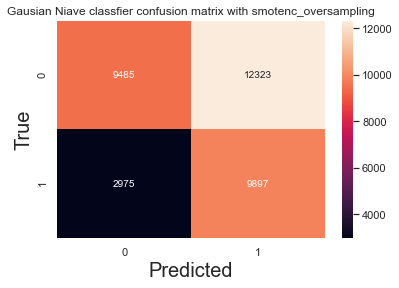

accuracy: 0.558881199538639
precision: 0.4454095409540954
recall: 0.7688781852082038
accuracy: [0.60086215 0.61046341 0.60473205 0.61970313 0.61906628]
accuracy_mean: 0.6109654038347374
precision: [0.57557073 0.58261889 0.57902129 0.58695807 0.58440386]
precision_mean: 0.5817145671872876
f1: [0.65807805 0.66663872 0.66003792 0.67991589 0.6840052 ]
f1_mean: 0.6697351557376112
recall/sensitivity: [0.7681983  0.77897521 0.76741452 0.80785812 0.82453218]
recall/sensitivity_mean: 0.7893956668584828
roc_auc: [0.66823452 0.67941285 0.66842668 0.68858094 0.68219461]
roc_auc_mean: 0.6773699200836308


In [341]:
grid_GNB, y_pred = GNB(X_trian_smotenc, y_train_smotenc,X_test)  # call the niav bias classfier to train and test the data
Evaluation(y_test, y_pred, 'Gausian Niave classfier confusion matrix with smotenc_oversampling')                #call the evaluation function to evaluate the model
cvl(grid_GNB,X_trian_smotenc, y_train_smotenc)



### 4.3.2 NIAV bias classfier with random_oversampling data


-----------------------------------------------------------------
Accuracy: 0.5460

-----------------------------------------------------------------
[[ 8170 13638]
 [ 2105 10767]]

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.37      0.51     21808
           1       0.44      0.84      0.58     12872

    accuracy                           0.55     34680
   macro avg       0.62      0.61      0.54     34680
weighted avg       0.66      0.55      0.53     34680



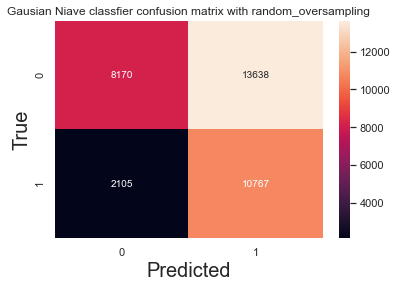

accuracy: 0.5460495963091119
precision: 0.441180086047941
recall: 0.836466749533872
accuracy: [0.60345841 0.6087489  0.60429117 0.60961152 0.60152844]
accuracy_mean: 0.605527688252766
precision: [0.57075851 0.57378357 0.57464413 0.57620767 0.5687471 ]
precision_mean: 0.5728281964863831
f1: [0.67788787 0.6836957  0.6698545  0.67974119 0.67829457]
f1_mean: 0.6778947658084961
recall/sensitivity: [0.83452533 0.84569413 0.80288038 0.82863022 0.84010973]
recall/sensitivity_mean: 0.8303679559168711
roc_auc: [0.66028876 0.66929179 0.65796389 0.66565987 0.65822348]
roc_auc_mean: 0.662285557918131


In [342]:

grid_GNB1, y_pred = GNB(X_train_ros, y_train_ros,X_test)  # call the niav bias classfier to train and test the data
Evaluation(y_test, y_pred, 'Gausian Niave classfier confusion matrix with random_oversampling')                #call the evaluation function to evaluate the model
cvl(grid_GNB1,X_train_ros, y_train_ros)    #call the cross_val_score function to evaluate model

### 4.3.2 NIAV bias classfier with random_oversampling data


-----------------------------------------------------------------
Accuracy: 0.5442

-----------------------------------------------------------------
[[ 8053 13755]
 [ 2052 10820]]

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.37      0.50     21808
           1       0.44      0.84      0.58     12872

    accuracy                           0.54     34680
   macro avg       0.62      0.60      0.54     34680
weighted avg       0.66      0.54      0.53     34680



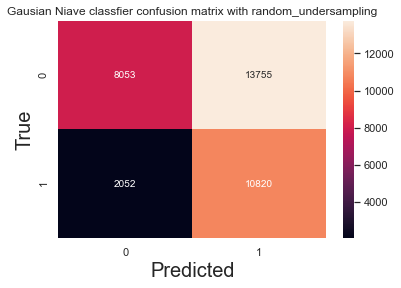

accuracy: 0.544204152249135
precision: 0.4402848423194303
recall: 0.8405842137973897
accuracy: [0.60356366 0.60235924 0.60595666 0.60687693 0.59792521]
accuracy_mean: 0.6033363412756513
precision: [0.57142857 0.5691351  0.57128378 0.5727459  0.56679977]
precision_mean: 0.570278626650059
f1: [0.67636413 0.67930639 0.68295638 0.68166113 0.67399267]
f1_mean: 0.6788561423874951
recall/sensitivity: [0.82850929 0.84236948 0.84889558 0.84172662 0.83118621]
recall/sensitivity_mean: 0.8385374356720844
roc_auc: [0.65945564 0.66374744 0.66518709 0.66218125 0.64918821]
roc_auc_mean: 0.6599519260112358


In [343]:
grid_GNB2, y_pred = GNB(X_trian_rus, y_train_rus,X_test)  # call the niav bias classfier to train and test the data
Evaluation(y_test, y_pred, 'Gausian Niave classfier confusion matrix with random_undersampling')                #call the evaluation function to evaluate the model
cvl(grid_GNB2,X_trian_rus, y_train_rus)    #call the cross_val_score function to evaluate model

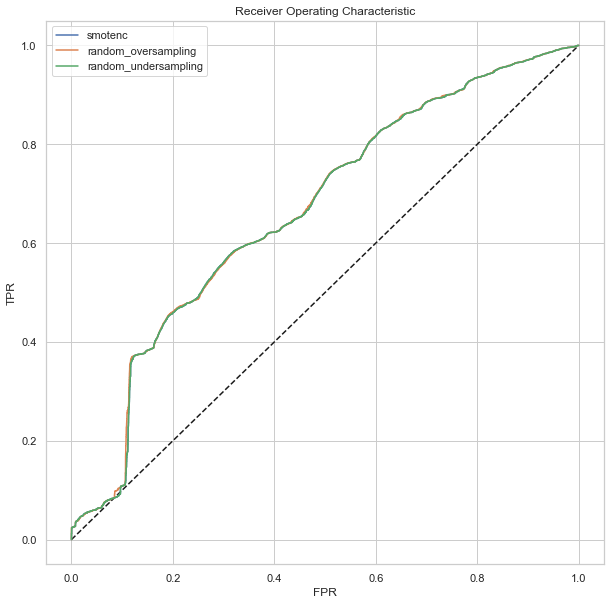

In [314]:
roc_function(grid_GNB,grid_GNB1,grid_GNB2,X_test,y_test)

## 4.4 XGB classfier

### 4.4.1 hyperparameter tunning function for XGB classfier

In [315]:
%%time
def XGB_param(X_train,y_train):
    model_XGB= make_pipeline(MinMaxScaler(),PCA(),XGBClassifier(objective= 'binary:logistic',
        nthread=4,
        seed=42))


    params = { 
        'xgbclassifier__n_estimators':range(60, 220, 40),
        'xgbclassifier__max_depth': range (2, 10, 1),
        'pca__n_components':[2],
        'xgbclassifier__learning_rate': [0.1, 0.01, 0.05]
    }
    XGB_CV = GridSearchCV(model_XGB,param_grid=params,scoring = 'roc_auc', n_jobs = -1, cv = 5,verbose=True
    )


    print("")
    print('-------------------------------------------------------------')
    XGB_CV.fit(X_train,y_train)
    print("")
    print('best parameters for XGBClassifier:',XGB_CV.best_params_)

Wall time: 0 ns


### 4.4.2 XGB classfier with smote_oversampling data

**== Compute the parameters for the XGB classfier for smote_oversampling data by calling the function ==**

In [145]:
XGB_param(X_trian_smotenc, y_train_smotenc)


-------------------------------------------------------------
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.2min finished



best parameters for XGBClassifier: {'pca__n_components': 2, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 9, 'xgbclassifier__n_estimators': 180}


In [316]:
## making pipline with the the obatined parameters using gridsearch
XGB_pipe_smote1 = make_pipeline(MinMaxScaler(), PCA(n_components=2),XGBClassifier(objective= 'binary:logistic',max_depth=9,
                                                                             learning_rate=0.1,
                                                                             n_estimators=180,
                                                                             nthread=4,
                                                                             seed=42))

In [317]:
XGB_pipe_smote1.fit(X_trian_smotenc, y_train_smotenc)     # training the model
y_pred1 =XGB_pipe_smote1.predict(X_test)              # making predictions

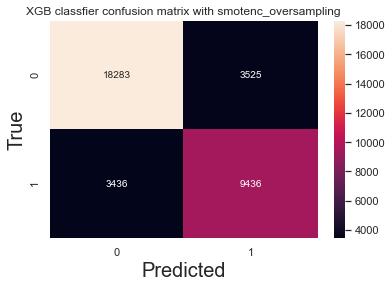

accuracy: 0.7992791234140715
precision: 0.7280302445798935
recall: 0.733064014916097


In [344]:
Evaluation(y_test, y_pred1, 'XGB classfier confusion matrix with smotenc_oversampling')                      # Evaluate the model by calling the evaluation function

In [318]:
cvl(XGB_pipe_smote1,X_trian_smotenc, y_train_smotenc)    #call the cross_val_score function to evaluate model

accuracy: [0.79185853 0.7891643  0.78598021 0.83941606 0.83760349]
accuracy_mean: 0.8088045166997784
precision: [0.82479285 0.82239214 0.81922572 0.83265583 0.82963459]
precision_mean: 0.8256789069618599
f1: [0.78074204 0.77770891 0.77422355 0.83709615 0.83955278]
f1_mean: 0.8018454509715005
recall/sensitivity: [0.74115803 0.73763104 0.7339081  0.84117186 0.84971098]
recall/sensitivity_mean: 0.7808727727189639
roc_auc: [0.87248667 0.87103162 0.86997145 0.91576635 0.91789698]
roc_auc_mean: 0.8893563956304655


### 4.4.3 XGB classfier with random_oversampling data

**== Compute the parameters for the XGB classfier for random_oversampling data by calling the function ==**

In [149]:
XGB_param(X_train_ros, y_train_ros)


-------------------------------------------------------------
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  8.7min finished



best parameters for XGBClassifier: {'pca__n_components': 2, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 9, 'xgbclassifier__n_estimators': 180}


In [346]:
## making pipline with the the obatined parameters using gridsearch
XGB_pipe_ros1 = make_pipeline(MinMaxScaler(), PCA(n_components=2),XGBClassifier(objective= 'binary:logistic',max_depth=9,
                                                                             learning_rate=0.1,
                                                                             n_estimators=180,
                                                                             nthread=4,
                                                                             seed=42))

In [347]:
XGB_pipe_ros1.fit(X_train_ros, y_train_ros)     # training the model
y_pred2 =XGB_pipe_ros1.predict(X_test)              # making predictions

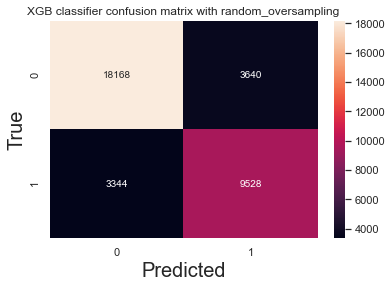

accuracy: 0.7986159169550173
precision: 0.7235722964763062
recall: 0.7402113113735239


In [348]:
Evaluation(y_test, y_pred2, 'XGB classifier confusion matrix with random_oversampling')                      # Evaluate the model by calling the evaluation function

In [349]:
cvl(XGB_pipe_ros1,X_train_ros, y_train_ros)    #call the cross_val_score function to evaluate model

accuracy: [0.79969629 0.79891251 0.79391594 0.80532014 0.80448734]
accuracy_mean: 0.8008387491933199
precision: [0.82591093 0.82299386 0.82223416 0.81826597 0.81754279]
precision_mean: 0.8213424911464647
f1: [0.79130302 0.79112604 0.78444433 0.79957806 0.80145993]
f1_mean: 0.7937747273850791
recall/sensitivity: [0.7646713  0.76163417 0.74997551 0.7803253  0.78524542]
recall/sensitivity_mean: 0.7684096156455358
roc_auc: [0.88862984 0.88560022 0.88351428 0.89644306 0.89685942]
roc_auc_mean: 0.8901684420049211


### 4.4.4 XGB classfier with random_undersampling data

**== Compute the parameters for the XGB classfier for random_undersampling data by calling the function ==**

In [153]:
XGB_param(X_trian_rus, y_train_rus)


-------------------------------------------------------------
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.2min finished



best parameters for XGBClassifier: {'pca__n_components': 2, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 9, 'xgbclassifier__n_estimators': 140}


In [350]:
## making pipline with the the obatined parameters using gridsearch
XGB_pipe_rus1 = make_pipeline(MinMaxScaler(), PCA(n_components=2),XGBClassifier(objective= 'binary:logistic',max_depth=9,
                                                                             learning_rate=0.1,
                                                                             n_estimators=140,
                                                                             nthread=4,
                                                                             seed=42))

In [351]:
XGB_pipe_rus1.fit(X_trian_rus, y_train_rus)     # training the model
y_pred3 =XGB_pipe_rus1.predict(X_test)              # making predictions

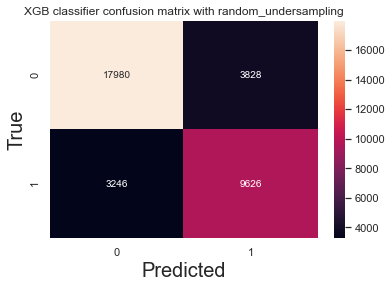

accuracy: 0.7960207612456748
precision: 0.7154749516872305
recall: 0.7478247358607831


In [352]:
Evaluation(y_test, y_pred3, 'XGB classifier confusion matrix with random_undersampling')                      # Evaluate the model by calling the evaluation function

In [353]:
cvl(XGB_pipe_rus1,X_trian_rus, y_train_rus)    #call the cross_val_score function to evaluate model

accuracy: [0.78475824 0.77804735 0.79134945 0.78474023 0.77695976]
accuracy_mean: 0.7837231697776303
precision: [0.81344383 0.79866978 0.81244413 0.80624888 0.80614309]
precision_mean: 0.8066508021013519
f1: [0.77443675 0.77008406 0.78283485 0.77733426 0.76800421]
f1_mean: 0.7744580975477425
recall/sensitivity: [0.74017065 0.7434739  0.75552209 0.75020914 0.73347833]
recall/sensitivity_mean: 0.7445373597451542
roc_auc: [0.86996122 0.8648673  0.87194107 0.8666005  0.86086765]
roc_auc_mean: 0.8668414595404658


## 4.5 logistic regression

### 4.5.1 Logistic regression hyper_parameter tuning function

In [354]:
## function to compute logistice regression paarameters 
def LG_param(X_train,y_train):
    model_LG= make_pipeline(MinMaxScaler(),PCA(),LogisticRegression())


    params = { 
        'logisticregression__max_iter': [10,100,1000],
        'pca__n_components':[2]
       
    }
    LG_CV = GridSearchCV(model_LG,param_grid=params, n_jobs = -1, cv = 5
    )


    print("")
    print('-------------------------------------------------------------')
    LG_CV.fit(X_train,y_train)
    print("")
    print('best parameters for LogisticRegression:',LG_CV.best_params_)

### 4.5.2 logisticRegression  with smote_oversampling data

**== Compute the parameters for the LogisticRegression  for smote_oversampling data by calling the function ==**

In [355]:
LG_param(X_trian_smote, y_train_smote)


-------------------------------------------------------------

best parameters for LogisticRegression: {'logisticregression__max_iter': 10, 'pca__n_components': 2}


In [356]:
## making pipline with the the obatined parameters using gridsearch
LG_pipe_smote1 = make_pipeline(MinMaxScaler(),PCA(),LogisticRegression(max_iter=10))

In [358]:
LG_pipe_smote1.fit(X_trian_smotenc, y_train_smotenc)     # training the model
y_pred1 =LG_pipe_smote1.predict(X_test)              # making predictions

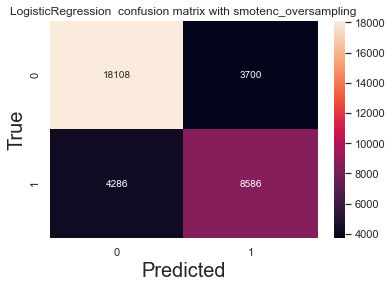

accuracy: 0.7697231833910034
precision: 0.6988442129252808
recall: 0.6670292106898695


In [359]:
Evaluation(y_test, y_pred1, 'LogisticRegression  confusion matrix with smotenc_oversampling')                      # Evaluate the model by calling the evaluation function

In [361]:
cvl(LG_pipe_smote1,X_trian_smotenc, y_train_smotenc)    #call the cross_val_score function to evaluate model

accuracy: [0.75389439 0.74639953 0.75022044 0.79762896 0.80037231]
accuracy_mean: 0.7697031253186412
precision: [0.80527742 0.79021463 0.80253494 0.81240358 0.81298489]
precision_mean: 0.8046830929980807
f1: [0.73127942 0.72569279 0.72658051 0.79271414 0.79628056]
f1_mean: 0.7545094826987724
recall/sensitivity: [0.66973646 0.67091212 0.66376016 0.7739565  0.78024885]
recall/sensitivity_mean: 0.711722816821714
roc_auc: [0.83040386 0.82203342 0.82298418 0.88572159 0.88595051]
roc_auc_mean: 0.8494187108611018


### 4.5.3 logisticRegression  with random_oversampling data

In [364]:
LG_param(X_train_ros, y_train_ros)


-------------------------------------------------------------

best parameters for LogisticRegression: {'logisticregression__max_iter': 10, 'pca__n_components': 2}


In [366]:
## making pipline with the the obatined parameters using gridsearch
LG_pipe_ros1 = make_pipeline(MinMaxScaler(),PCA(),LogisticRegression(max_iter=10))

In [368]:
LG_pipe_ros1.fit(X_train_ros, y_train_ros)     # training the model
y_pred2 =LG_pipe_ros1.predict(X_test)              # making predictions

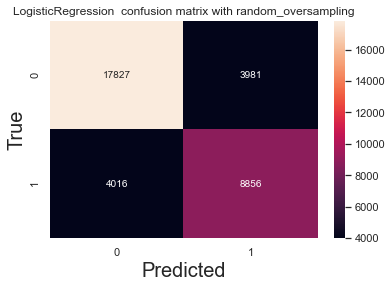

accuracy: 0.769405997693195
precision: 0.6898808132741294
recall: 0.6880049720323183


In [369]:
Evaluation(y_test, y_pred2, 'LogisticRegression  confusion matrix with random_oversampling')                      # Evaluate the model by calling the evaluation function

In [370]:
cvl(LG_pipe_ros1,X_train_ros, y_train_ros)    #call the cross_val_score function to evaluate model

accuracy: [0.75864603 0.7545312  0.7513961  0.75060011 0.75108999]
accuracy_mean: 0.7532526862946942
precision: [0.79510396 0.78956754 0.79159091 0.78681171 0.78585768]
precision_mean: 0.7897863604390029
f1: [0.7427557  0.73872465 0.73299311 0.73377608 0.73499192]
f1_mean: 0.7366482910984613
recall/sensitivity: [0.69687469 0.69403351 0.68247281 0.68743876 0.69031057]
recall/sensitivity_mean: 0.6902260691439505
roc_auc: [0.83693902 0.82853377 0.82504978 0.82503864 0.82783134]
roc_auc_mean: 0.8286785099221415


### 4.5.4 logisticRegression  with random_undersampling data

In [ ]:
LG_param(X_trian_rus, y_train_rus)

In [371]:
## making pipline with the the obatined parameters using gridsearch
LG_pipe_rus1 = make_pipeline(MinMaxScaler(),PCA(),LogisticRegression(max_iter=10))

In [372]:
LG_pipe_rus1.fit(X_trian_rus, y_train_rus)     # training the model
y_pred3=LG_pipe_rus1.predict(X_test)              # making predictions

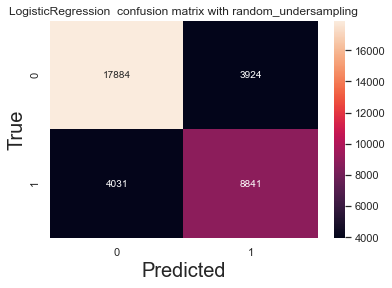

accuracy: 0.7706170703575548
precision: 0.6925969447708579
recall: 0.6868396519577378


In [373]:
Evaluation(y_test, y_pred3, 'LogisticRegression  confusion matrix with random_undersampling')                      # Evaluate the model by calling the evaluation function

In [374]:
cvl(LG_pipe_rus1,X_trian_rus, y_train_rus)    #call the cross_val_score function to evaluate model

accuracy: [0.75614857 0.75278173 0.75654647 0.75336736 0.74207312]
accuracy_mean: 0.7521834493671962
precision: [0.79914029 0.78754997 0.78761726 0.78941334 0.78118927]
precision_mean: 0.7889820266118919
f1: [0.73726904 0.73684211 0.74261454 0.73702052 0.72282658]
f1_mean: 0.7353145558564702
recall/sensitivity: [0.68428978 0.69226908 0.70247657 0.69114941 0.67257822]
recall/sensitivity_mean: 0.6885526098594366
roc_auc: [0.82950087 0.82497996 0.836646   0.82796541 0.81839437]
roc_auc_mean: 0.8274973216903133


## plot roc_auc curve for logisticregression

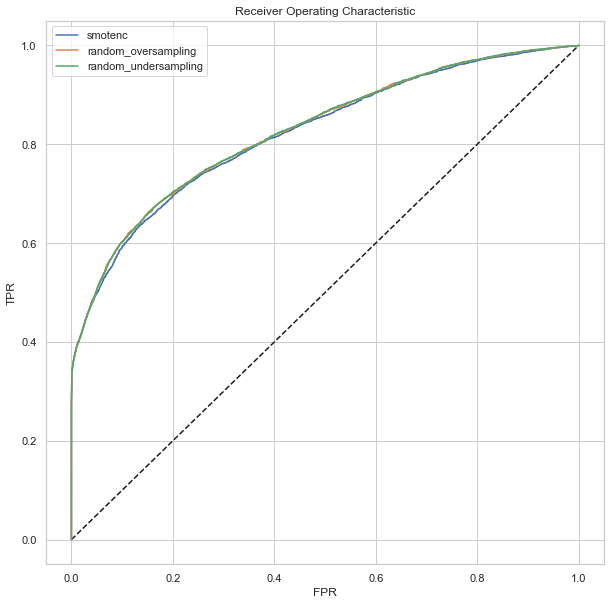

In [375]:
roc_function(LG_pipe_smote1,LG_pipe_ros1,LG_pipe_rus1,X_test,y_test)